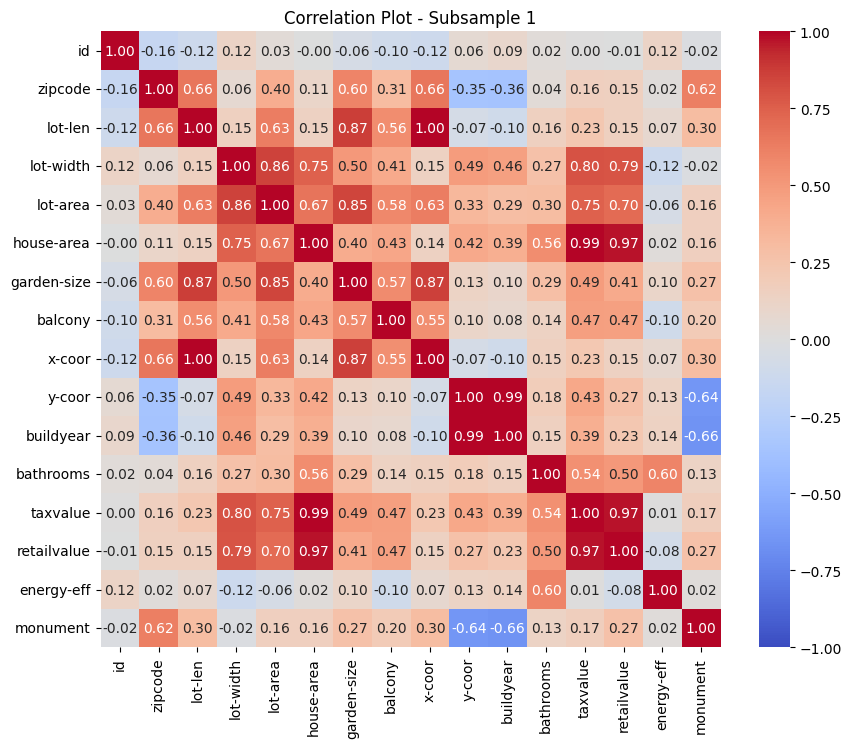

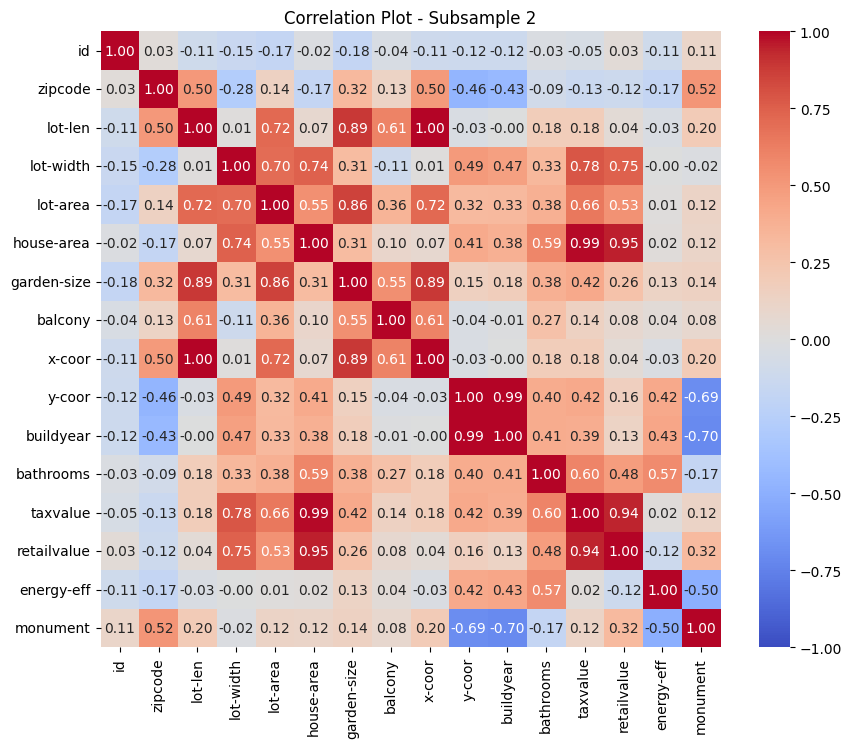

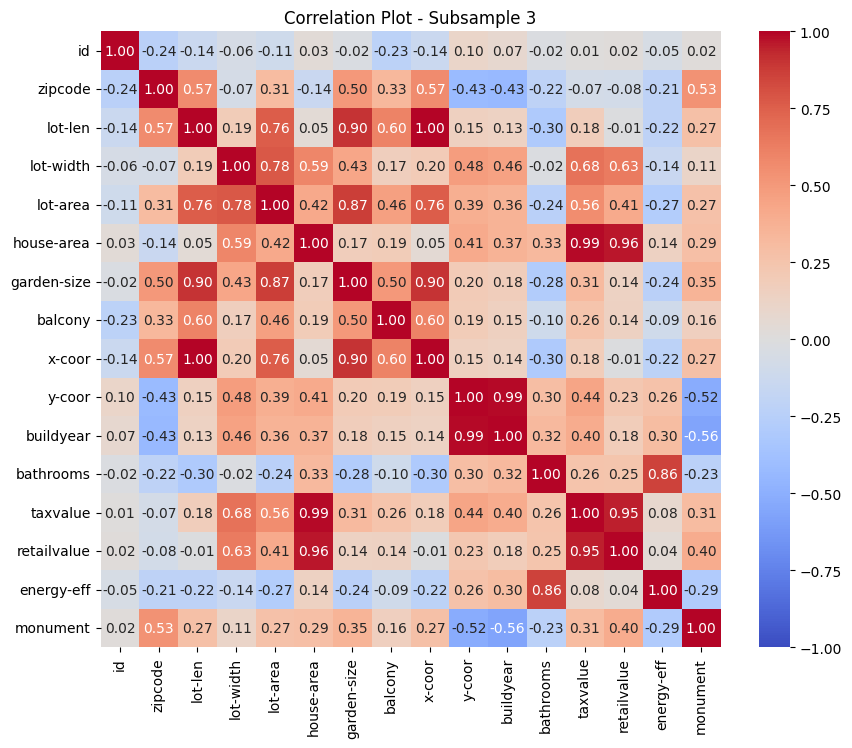

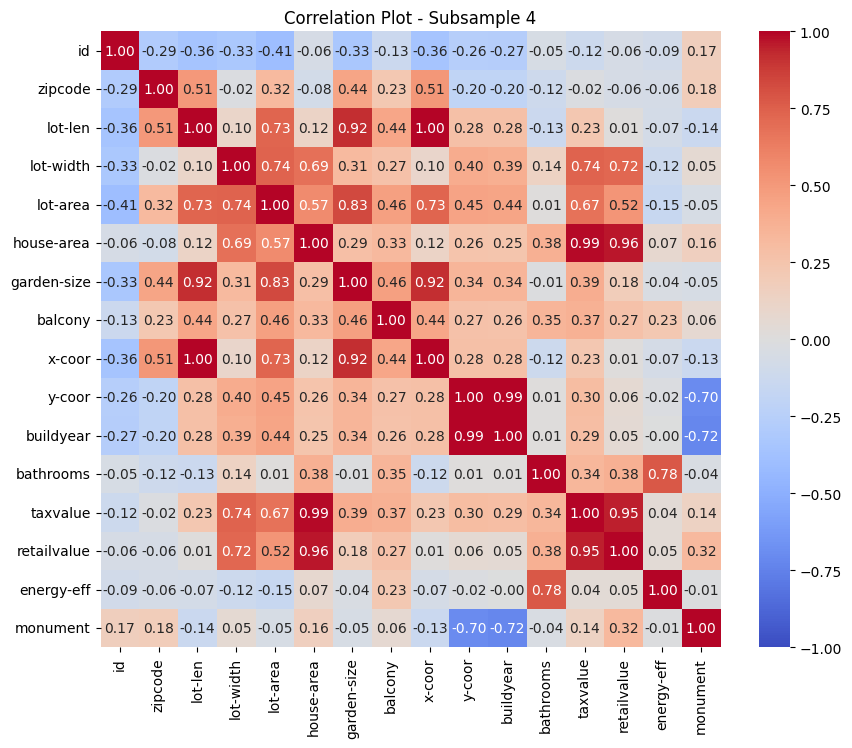

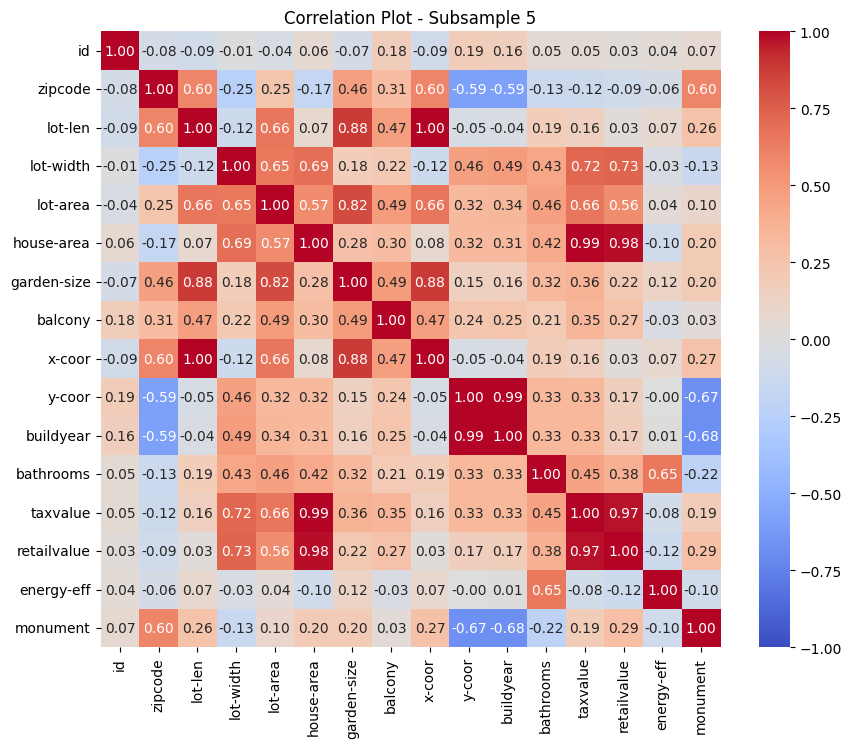

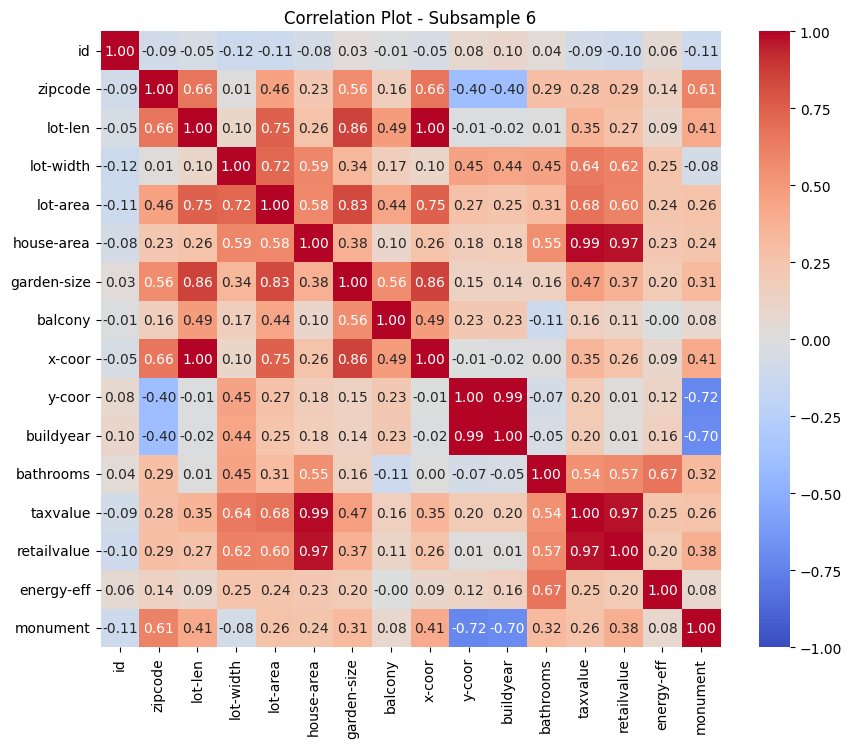

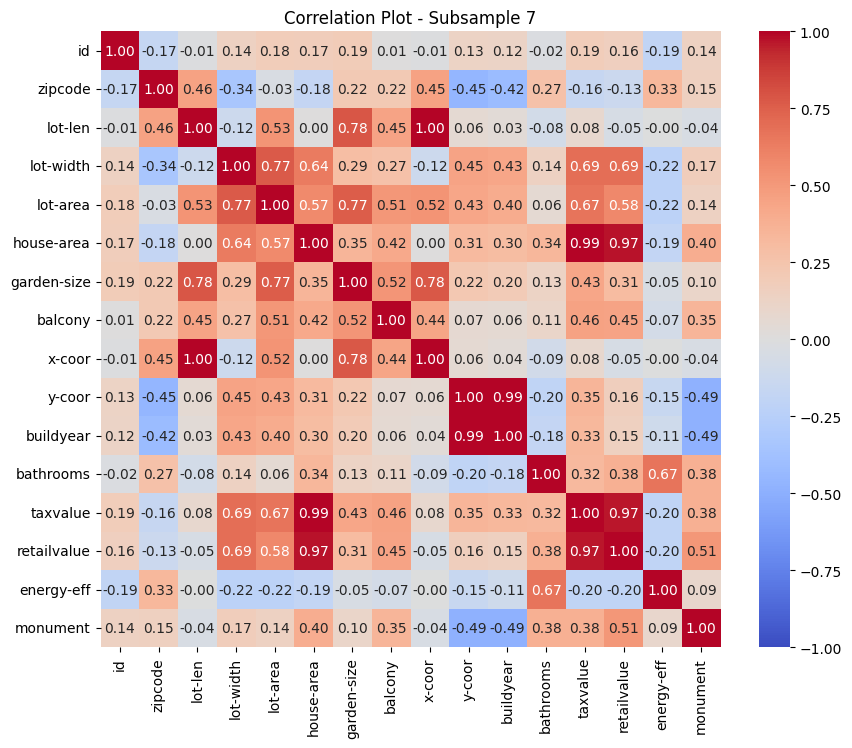

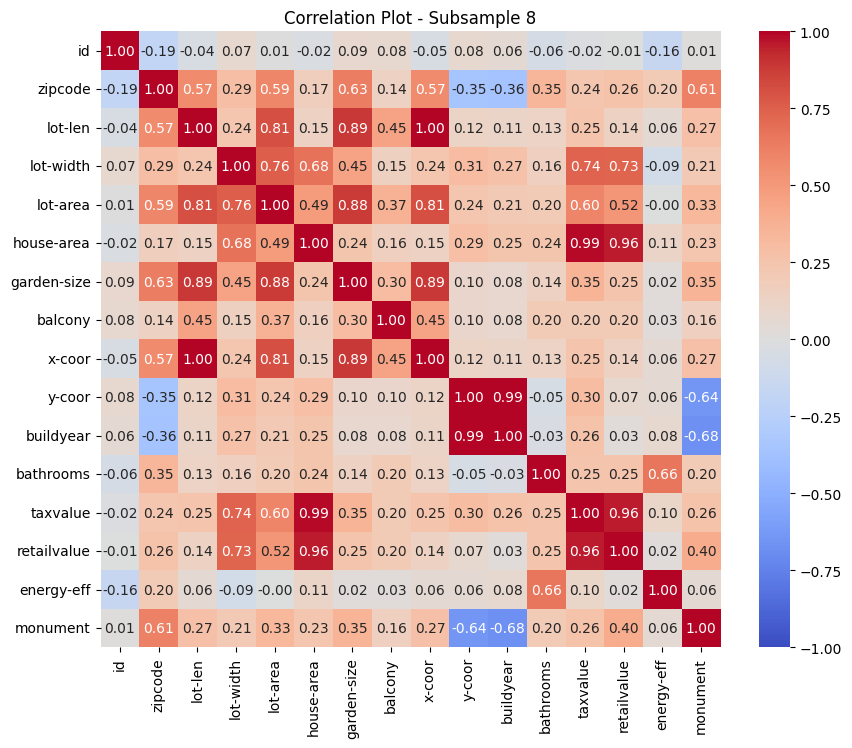

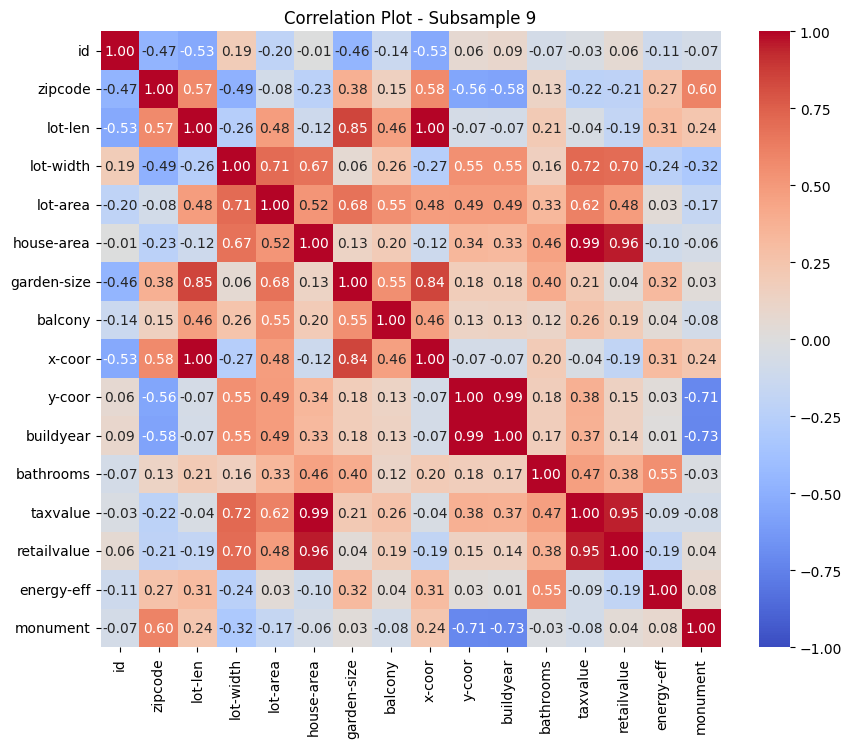

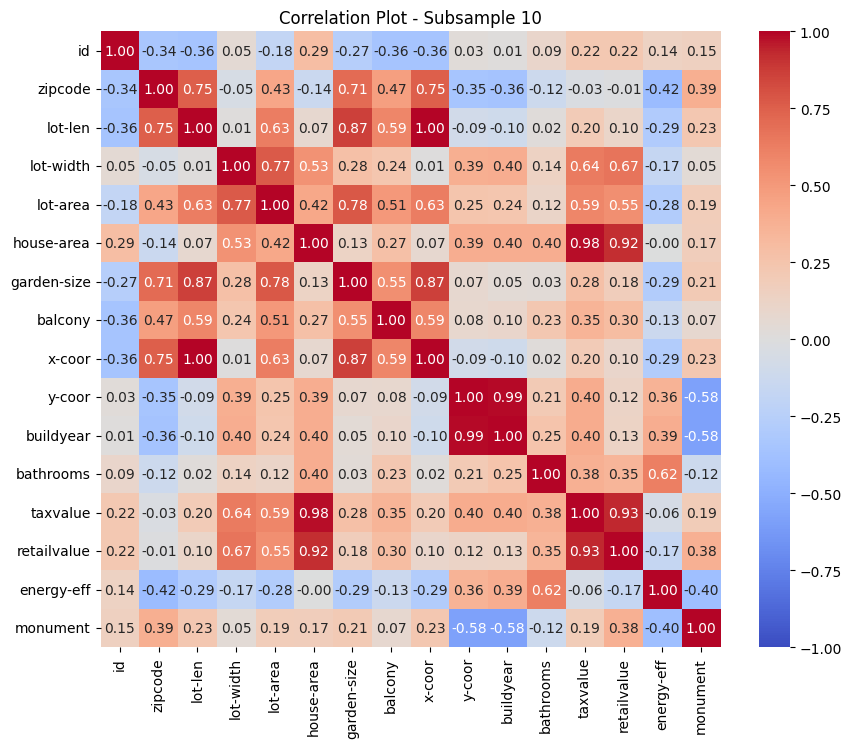

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

utrecht_houses = pd.read_csv("utrechthousinglarge.csv")
num_subsamples = 10

subsample_size = len(utrecht_houses) // num_subsamples

for i in range(num_subsamples):
    subsample = utrecht_houses.sample(n=subsample_size, random_state=i)

    numeric_cols = subsample.select_dtypes(include=['number']).columns
    subsample_numeric = subsample[numeric_cols]
    corr = subsample_numeric.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f"Correlation Plot - Subsample {i+1}")
    plt.show()

 If your problem is a regression problem visually the distribution of your target variabe

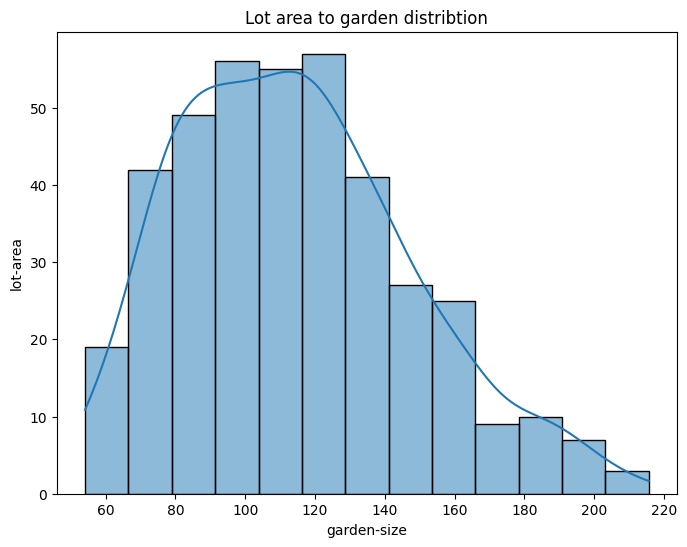

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=utrecht_houses, x='lot-area', kde=True)
plt.title('Lot area to garden distribtion')
plt.xlabel('garden-size')
plt.ylabel('lot-area')
plt.show()

Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable

<Figure size 1000x800 with 0 Axes>

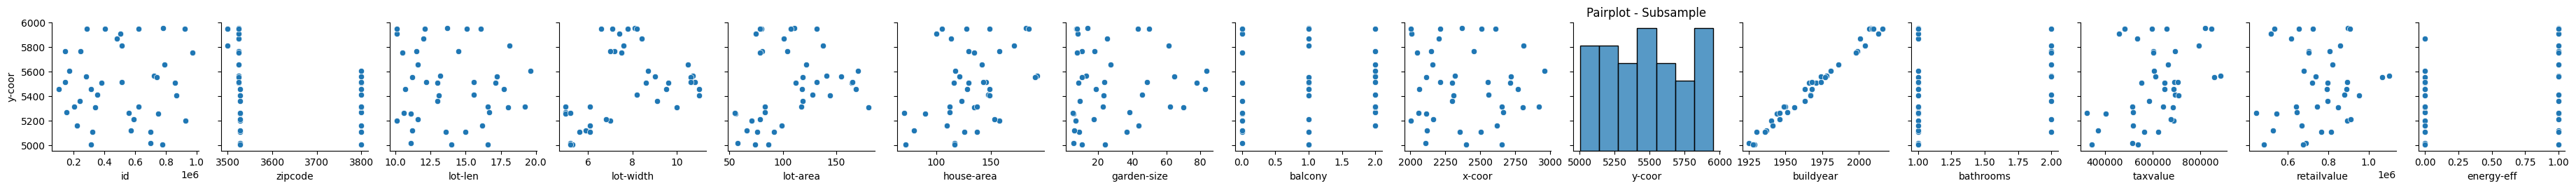

In [10]:
num_subsamples = 10

subsample_size = len(utrecht_houses) // num_subsamples

plt.figure(figsize=(10, 8))
sns.pairplot(subsample, x_vars=subsample.columns[:-1], y_vars=['y-coor'])
plt.title("Pairplot - Subsample")
plt.show()

<Figure size 1200x1000 with 0 Axes>

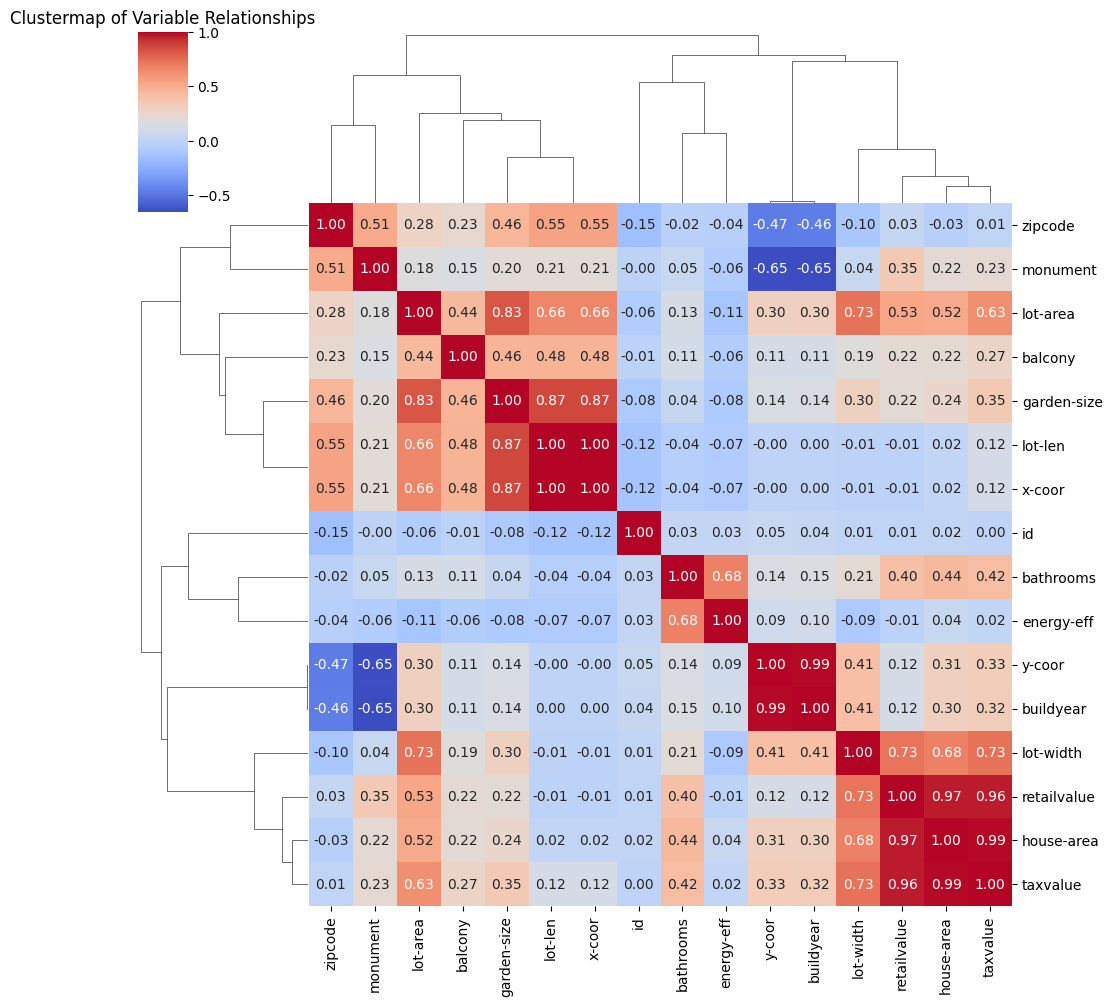

In [11]:
numeric_cols = utrecht_houses.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Clustermap of Variable Relationships')
plt.show()